In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
sns.set_style("whitegrid")
sns.set_context("paper")

C:\Users\Egharevba Blessing\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv.xls")

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


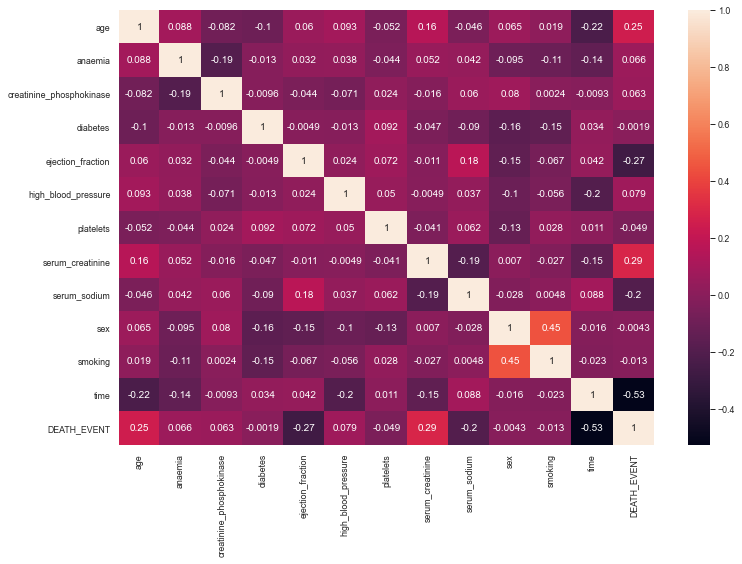

In [8]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True)

Performing some Feture Engineering

In [9]:
# Total CPK normal values: 10 to 120 micrograms per liter (mcg/L)
def set_cpk(row):
    if row["creatinine_phosphokinase"] < 10:
        return "Low"
    elif row["creatinine_phosphokinase"] >=10 and row["creatinine_phosphokinase"] <= 120:
        return "Normal"
    else:
        return "High"
    
df = df.assign(cpk_desc = df.apply(set_cpk, axis = 1))



# EJECTION FRACTION    HEART'S PUMPING ABILITY
# Normal               50-75 %
# Below Normal         36-49 %
# Low                  35% and below

def set_eject_fract(row):
    if row["ejection_fraction"] <= 35:
        return "Low"
    elif row["ejection_fraction"] > 35 and row["ejection_fraction"] <= 49:
        return "Below_Normal"
    elif row["ejection_fraction"] > 50 and row["ejection_fraction"] <= 75:
        return "Normal"
    else:
        return "High"
    
df = df.assign(ejection_fraction_desc = df.apply(set_eject_fract, axis = 1))




#  For women, the average platelet count is between 157,000 and 371,000 per microliter of blood. 
#  For men, the average is between 135,000 and 317,000 per microliter of blood
def set_platelets(row):    
    if row["sex"] == 0:  #females
        if row["platelets"] < 157000:
            return "Low"
        elif row["platelets"] >=157000 and row["platelets"] <= 371000:
            return "Normal"
        else:
            return "High"
        
    elif row["sex"] == 1:  #males
        if row["platelets"] < 135000:
            return "Low"
        if row["platelets"] >= 135000 and row["platelets"] <= 317000:
            return "Normal"
        else:
            return "High"
    
df = df.assign(platelets_desc = df.apply(set_platelets, axis = 1))



# The normal range for blood sodium levels is 135 to 145 milliequivalents per liter (mEq/L)

def set_sodium(row):
    if row["serum_sodium"] < 135:
        return "Low"
    elif row["serum_sodium"] >=135 and row["serum_sodium"] <= 145:
        return "Normal"
    else:
        return "High"
df = df.assign(sodium_desc = df.apply(set_sodium, axis = 1))
    
    
# Normal levels of creatinine in the blood are approximately 0.6 to 1.2 milligrams (mg) per deciliter (dL) in adult males 
# and 0.5 to 1.1 milligrams per deciliter in adult females.

def set_creatinine(row):
    if row["sex"] == 0:  #females
        if row["serum_creatinine"] < 0.5:
            return "Low"
        elif row["serum_creatinine"] >=0.5 and row["serum_creatinine"] <= 1.1:
            return "Normal"
        else:
            return "High"
        
    elif row["sex"] == 1:  #males
        if row["serum_creatinine"] < 0.6:
            return "Low"
        if row["serum_creatinine"] >=0.6 and row["serum_creatinine"] <= 1.2:
            return "Normal"
        else:
            return "High"
df = df.assign(serum_creatinine_desc = df.apply(set_creatinine, axis = 1))

In [10]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,cpk_desc,ejection_fraction_desc,platelets_desc,sodium_desc,serum_creatinine_desc
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,High,Low,Normal,Low,High
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,High,Below_Normal,Normal,Normal,Normal
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,High,Low,Normal,Low,High
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,Normal,Low,Normal,Normal,High
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,High,Low,Normal,Low,High


### Ejection fraction is a measurement of the percentage of blood leaving your heart each time it contracts. The heart contracts and relaxes.

Low             142
Below_Normal     97
Normal           38
High             22
Name: ejection_fraction_desc, dtype: int64


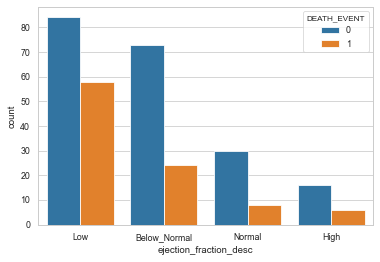

In [11]:
print(df["ejection_fraction_desc"].value_counts())

sns.countplot(df['ejection_fraction_desc'], hue = df["DEATH_EVENT"])

Those with very Low Ejection Fraction dominated the dataset, followed by those with below normal

Normal    231
High       47
Low        21
Name: platelets_desc, dtype: int64


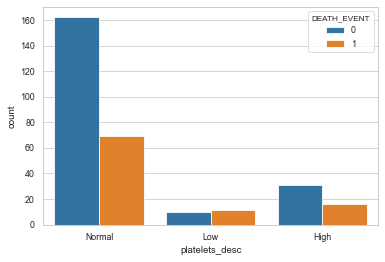

In [12]:
print(df["platelets_desc"].value_counts())

sns.countplot(df['platelets_desc'],  hue = df["DEATH_EVENT"])

### Creatine phosphokinase (a.k.a., creatine kinase, CPK, or CK) is an enzyme (a protein that helps to elicit chemical changes in your body) found in your heart, brain, and skeletal muscles. When muscle tissue is damaged, CPK leaks into your blood. Therefore, high levels of CPK usually indicate some sort of stress or injury to your heart or other muscles.

High      222
Normal     77
Name: cpk_desc, dtype: int64


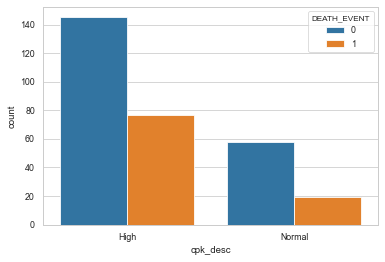

In [13]:
print(df["cpk_desc"].value_counts())

sns.countplot(df['cpk_desc'], hue = df["DEATH_EVENT"])

Normal    214
Low        83
High        2
Name: sodium_desc, dtype: int64


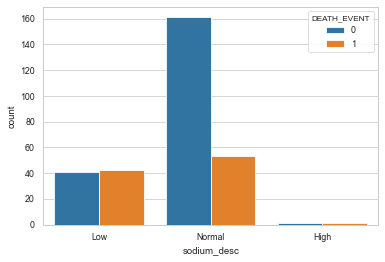

In [14]:
print(df["sodium_desc"].value_counts())

sns.countplot(df['sodium_desc'],  hue = df["DEATH_EVENT"])

Normal    185
High      114
Name: serum_creatinine_desc, dtype: int64


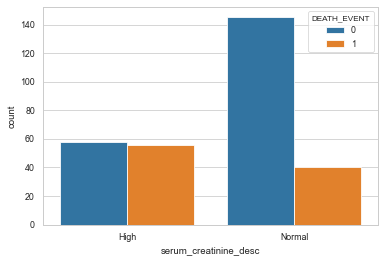

In [15]:
print(df["serum_creatinine_desc"].value_counts())

sns.countplot(df['serum_creatinine_desc'],  hue = df["DEATH_EVENT"])

To get the Unique values of some of the columns in the dataset

In [16]:
values = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking", "DEATH_EVENT" ]

In [17]:
for i in values:
    count = df[i].value_counts()
    if i == "sex":
        continue
    print("The unique values of {} are \n {} ".format(i, count))
    if count.idxmax() == 0:
        print("We have less {} in our dataset \n".format(i))
    else:
        print("We have more {} in our dataset \n".format(i))

The unique values of anaemia are 
 0    170
1    129
Name: anaemia, dtype: int64 
We have less anaemia in our dataset 

The unique values of diabetes are 
 0    174
1    125
Name: diabetes, dtype: int64 
We have less diabetes in our dataset 

The unique values of high_blood_pressure are 
 0    194
1    105
Name: high_blood_pressure, dtype: int64 
We have less high_blood_pressure in our dataset 

The unique values of smoking are 
 0    203
1     96
Name: smoking, dtype: int64 
We have less smoking in our dataset 

The unique values of DEATH_EVENT are 
 0    203
1     96
Name: DEATH_EVENT, dtype: int64 
We have less DEATH_EVENT in our dataset 



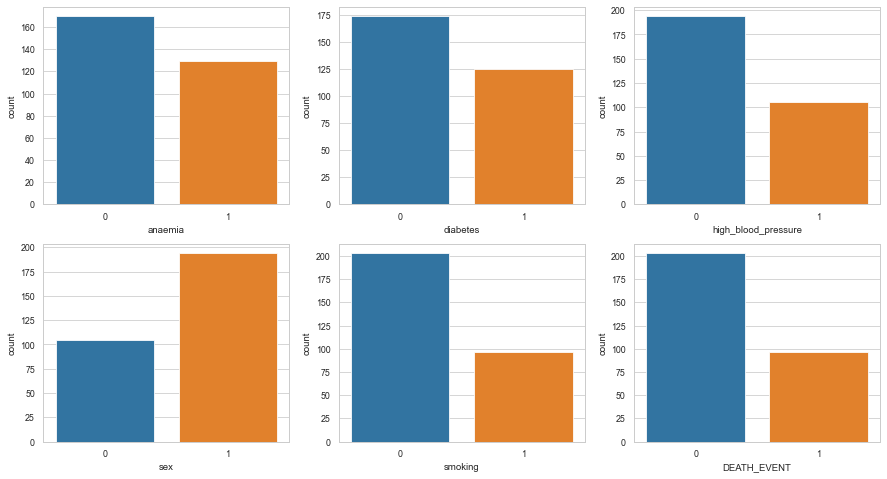

In [18]:
# to graphically show what we have above

fig,ax = plt.subplots(2,3,figsize=(15,8))
ax1,ax2,ax3,ax4, ax5, ax6 = ax.flatten()

sns.countplot(df['anaemia'],ax=ax1)
sns.countplot(df['diabetes'],ax=ax2)
sns.countplot(df['high_blood_pressure'],ax=ax3)
sns.countplot(df['sex'],ax=ax4)
sns.countplot(df['smoking'],ax=ax5)
sns.countplot(df['DEATH_EVENT'],ax=ax6)

### We have more more of people without the factors in each plot. For the sex factor, we have more Female 

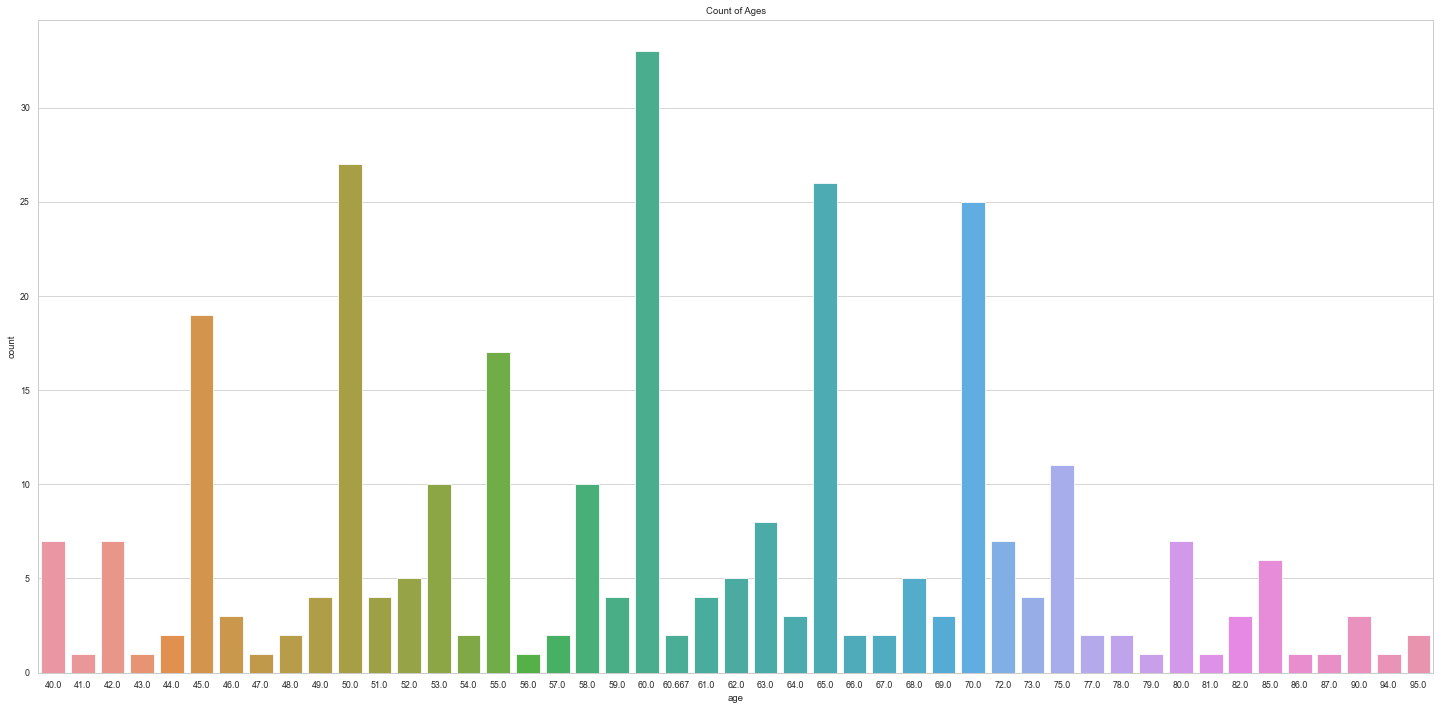

In [19]:
# a plot to show the ages we have in the dataset

plt.figure(figsize = (25,12))
plt.title("Count of Ages")
sns.countplot(df["age"])

### from this plot, we can see that more people of the age of 60

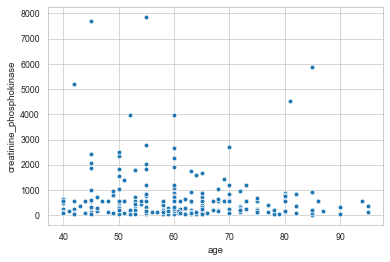

In [20]:
sns.scatterplot(y = "creatinine_phosphokinase", x= "age", data = df)

### The plot shows that creatinine_phosphokinase is not an age facor
### We have some outliers

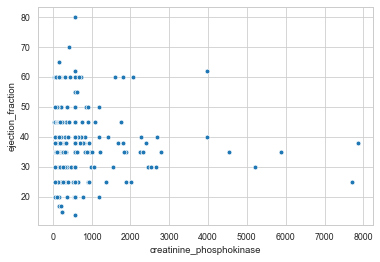

In [21]:
sns.scatterplot(y = "ejection_fraction", x= "creatinine_phosphokinase", data = df)

<Figure size 1800x864 with 0 Axes>

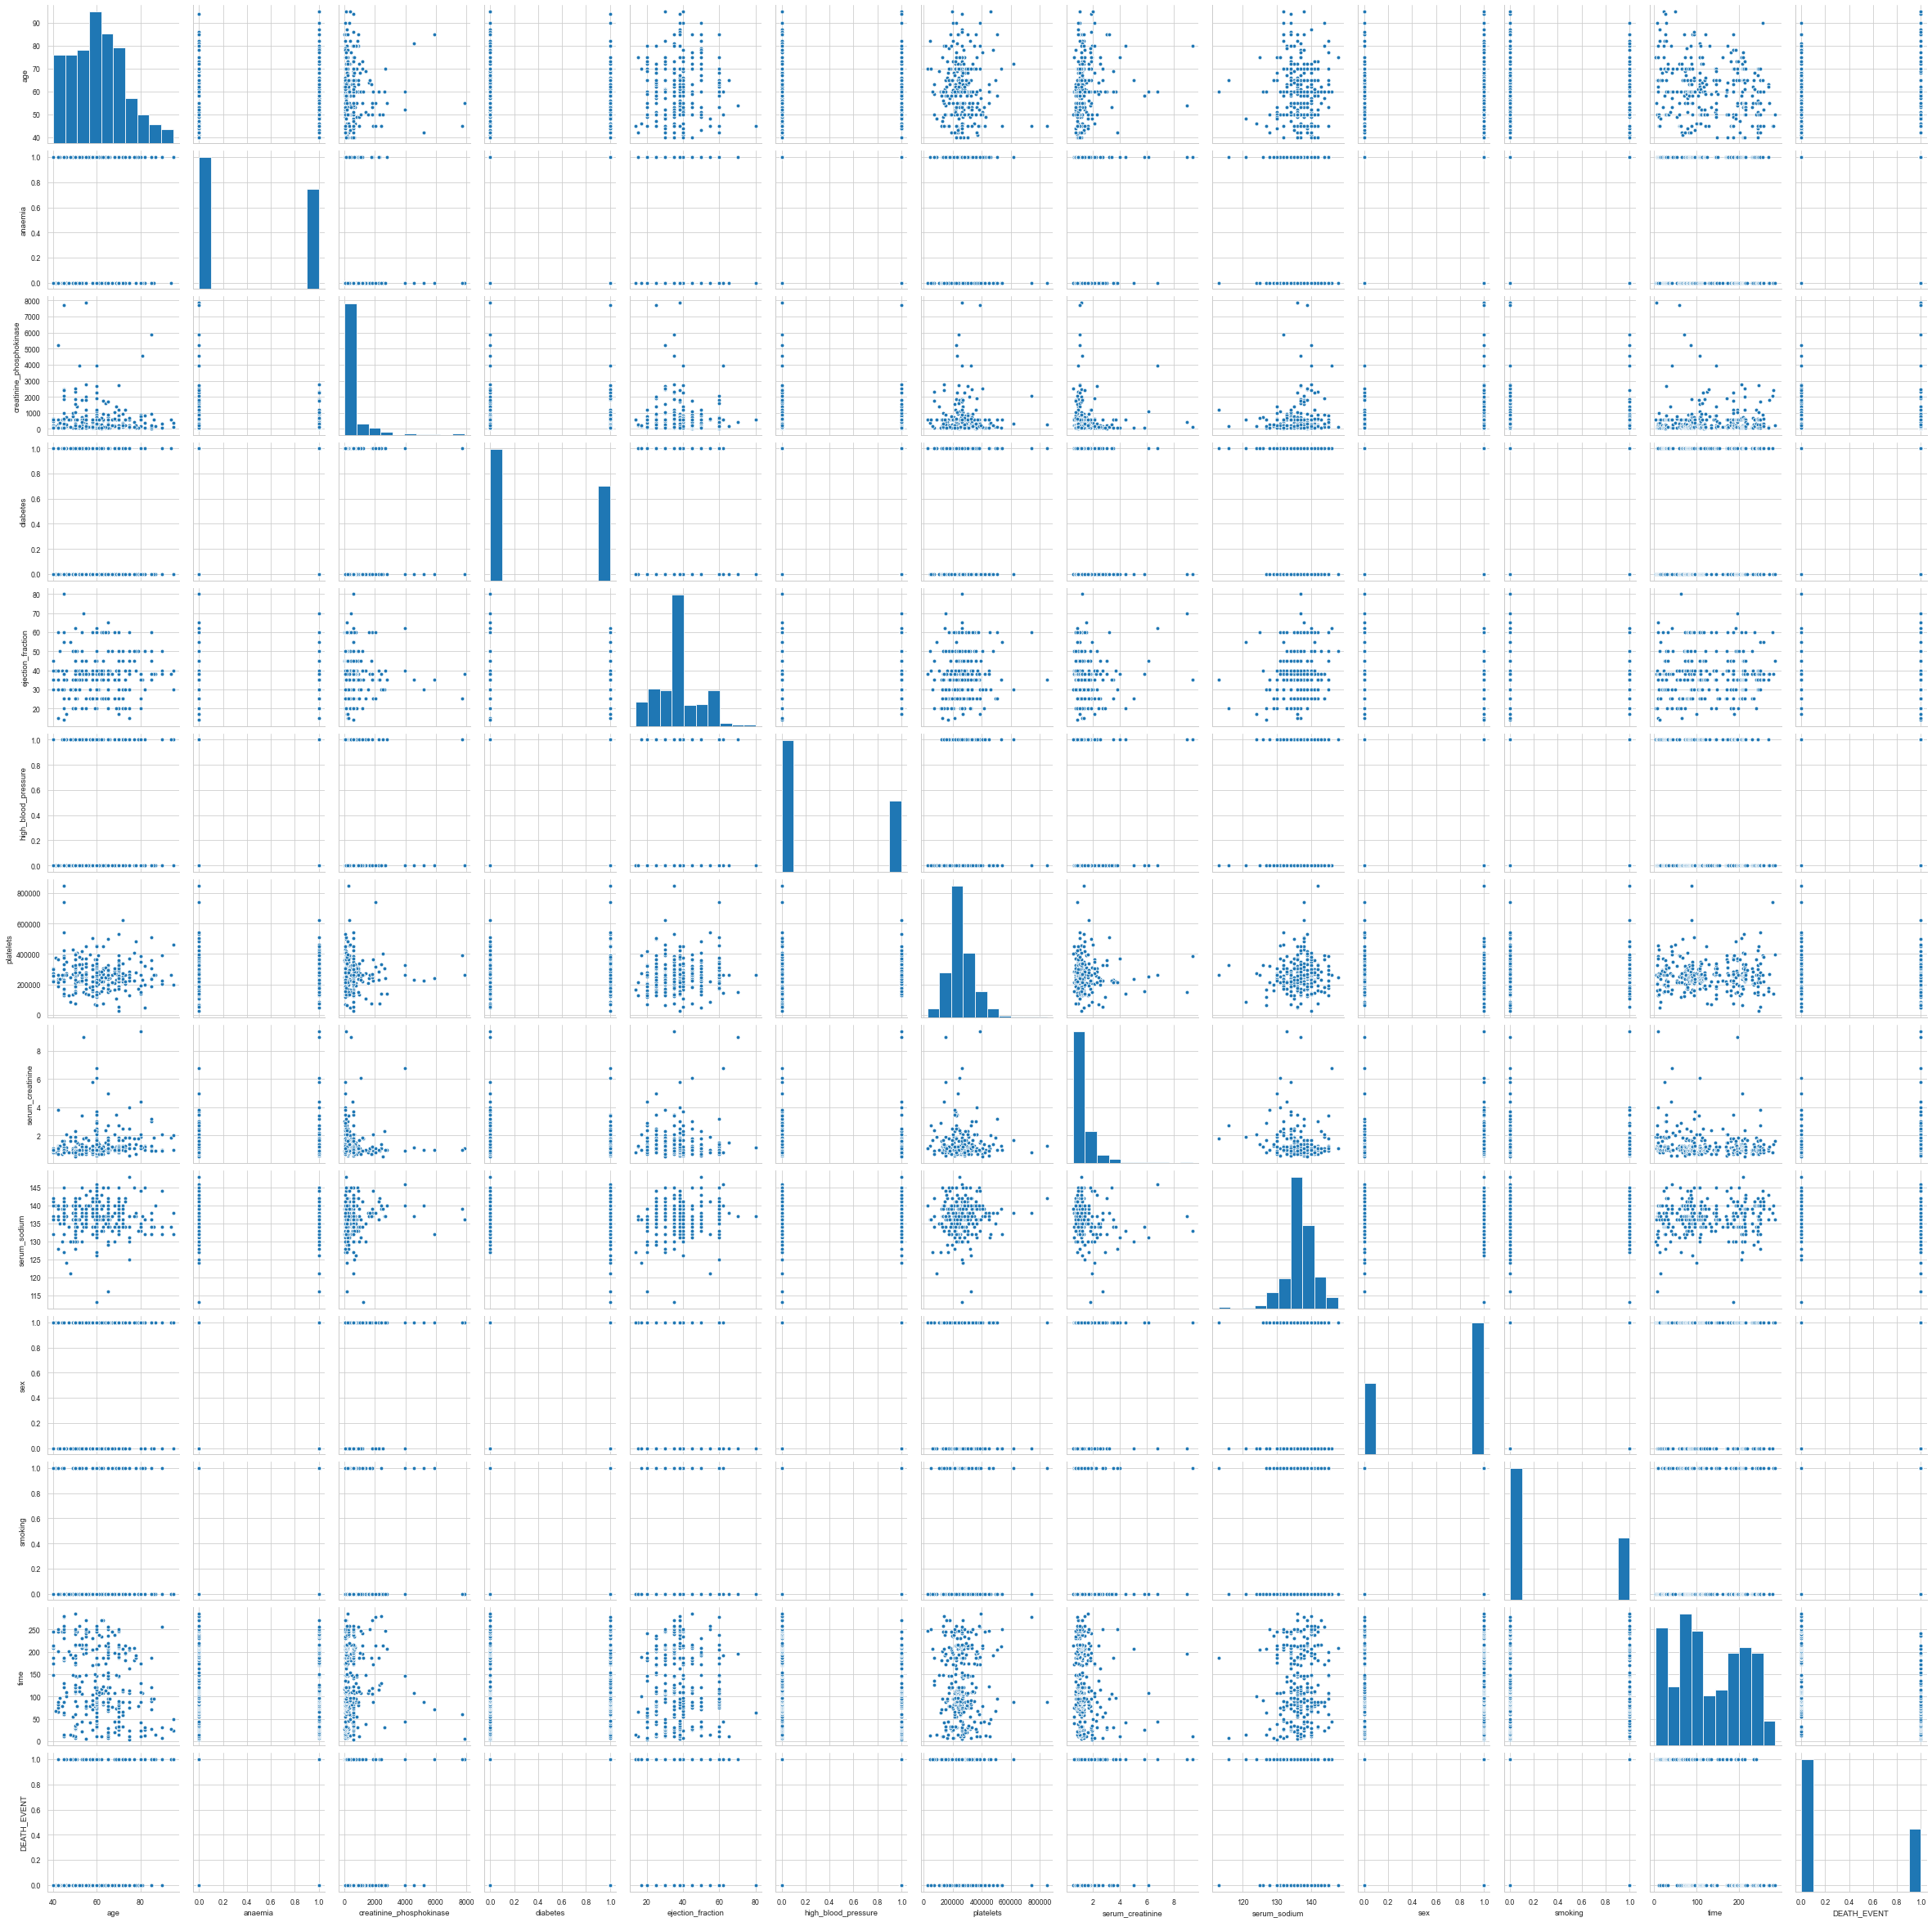

In [22]:
# Graphically showing the realtionship between each fields

plt.figure(figsize = (25,12))
sns.pairplot(df)

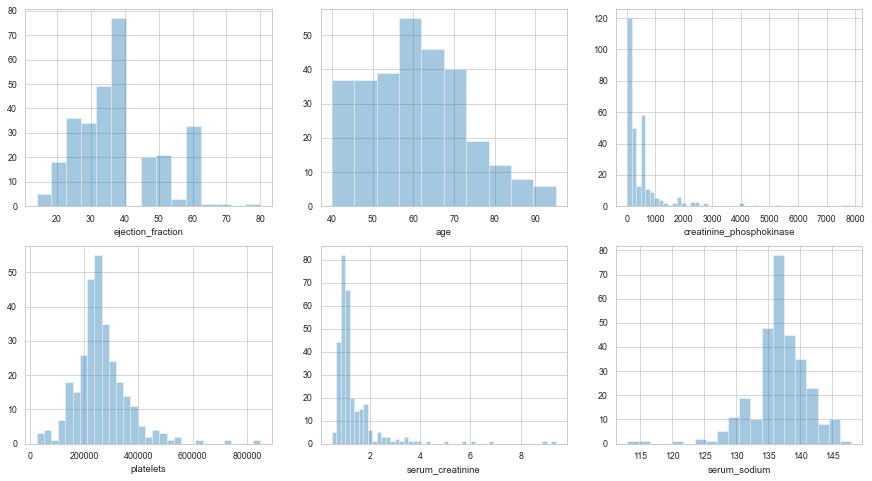

In [23]:
# Graphically showing the distribution of some of the fields in the dataset

fig,ax = plt.subplots(2,3,figsize=(15,8))
ax1,ax2,ax3,ax4, ax5, ax6 = ax.flatten()
sns.distplot(df['ejection_fraction'],ax=ax1, kde = False)
sns.distplot(df['age'],ax=ax2, kde = False)
sns.distplot(df['creatinine_phosphokinase'],ax=ax3, kde = False)
sns.distplot(df['platelets'],ax=ax4, kde = False)
sns.distplot(df['serum_creatinine'],ax=ax5, kde = False)
sns.distplot(df['serum_sodium'],ax=ax6, kde = False)

In [24]:
# Distingushing those that died from a factor, from those that didn't

factors = ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking']

for i in factors:
    
    factor = df[df[i] == 1]
    non_factor = df[df[i] == 0]

    dead_factor = (factor["DEATH_EVENT"] == 1).sum()
    non_dead_factor = (factor["DEATH_EVENT"] == 0).sum()
    dead_non_factor = (non_factor["DEATH_EVENT"] == 1).sum()
    not_dead_non_factor = (non_factor["DEATH_EVENT"] == 0).sum()


    print("The number of dead {} pateints is {}".format(i, dead_factor))
    print("The number of non_dead {} patients is {}".format(i, non_dead_factor))

    print("The number of dead non_{} patients is {}".format(i, dead_non_factor))
    print("The number of non_dead non_{} patients is {}".format(i, not_dead_non_factor))
    print("========================================")
    print("========================================")

The number of dead anaemia pateints is 46
The number of non_dead anaemia patients is 83
The number of dead non_anaemia patients is 50
The number of non_dead non_anaemia patients is 120
The number of dead diabetes pateints is 40
The number of non_dead diabetes patients is 85
The number of dead non_diabetes patients is 56
The number of non_dead non_diabetes patients is 118
The number of dead high_blood_pressure pateints is 39
The number of non_dead high_blood_pressure patients is 66
The number of dead non_high_blood_pressure patients is 57
The number of non_dead non_high_blood_pressure patients is 137
The number of dead smoking pateints is 30
The number of non_dead smoking patients is 66
The number of dead non_smoking patients is 66
The number of non_dead non_smoking patients is 137


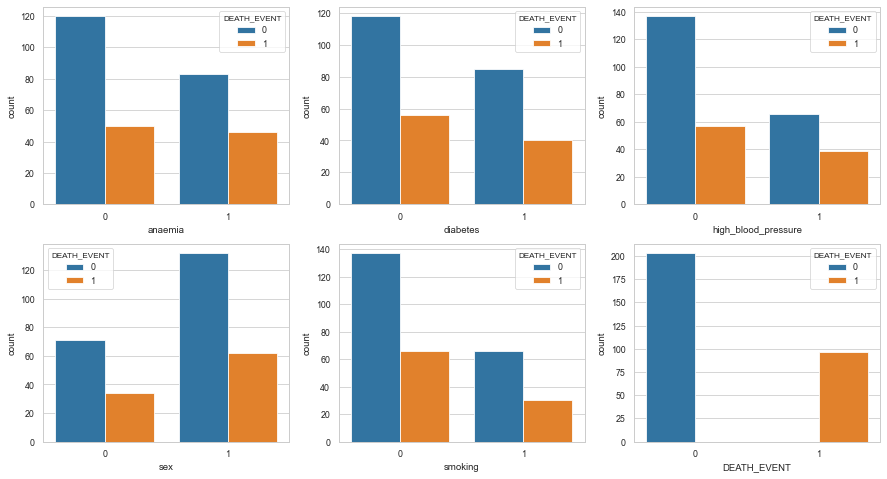

In [25]:
# to graphically show what we have above

fig,ax = plt.subplots(2,3,figsize=(15,8))
ax1,ax2,ax3,ax4, ax5, ax6 = ax.flatten()

sns.countplot(df['anaemia'], hue = df["DEATH_EVENT"],ax=ax1)
sns.countplot(df['diabetes'],hue = df["DEATH_EVENT"],ax=ax2)
sns.countplot(df['high_blood_pressure'],hue = df["DEATH_EVENT"], ax=ax3)
sns.countplot(df['sex'],hue = df["DEATH_EVENT"], ax=ax4)
sns.countplot(df['smoking'],hue = df["DEATH_EVENT"], ax=ax5)
sns.countplot(df['DEATH_EVENT'],hue = df["DEATH_EVENT"], ax=ax6)

This shows that anaemia is not the only factor to consider when considering the reason for death since we have about 83 non_dead anaemia patients, as well as 50 dead non_anaemia patients in the dataset.

This also shows that diabetes is not the only factor to consider when considering the reason for death, since we have about 85 non_dead diabetic patients, as well as 56 dead non_diabetic patients in the dataset.

This also shows that smoking is not the only factor to consider when considering the reason for death, since we have about 66 dead non_smokers, as well as 66 non_dead smokers in the dataset.

Neither is high blood pressure the only factor

With this, we can see that all factors in the dataset is a great factor in knowing if a patient would die or not

In [26]:
df["DEATH_EVENT"].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

#### from this, we can see that the dataset is imbalanced, having more of those that didnt survive than those that survived.